# Introduction

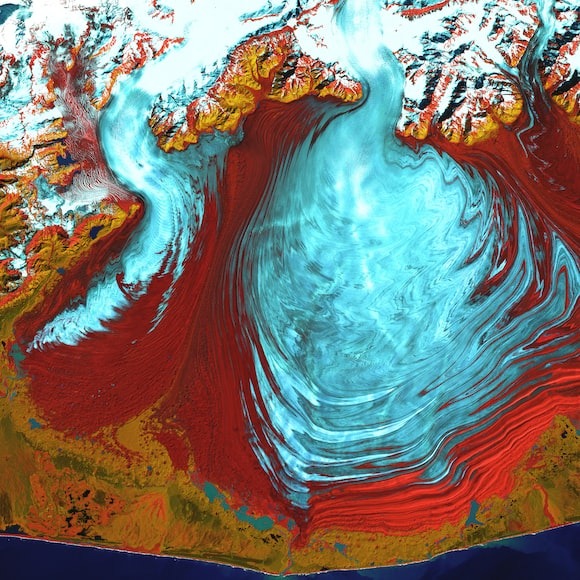

In [1]:
from IPython import display
display.Image(url ='https://images.unsplash.com/photo-1573491601995-695e5154f91b?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=580&q=80.jpg',
              embed=True,
              width=600,
              height=400
             )

If you are a fan of Qgis or its commercial counterpart ArcPro, you know that they have a myriad of tools to perform imagery analysis. By the way, there has been, and there still is a free ESRI Massive Open Online Cource (MOOC) known as imagery analysis that gives you a headstart on raster analysis in GIS. Anyway, back to our script. Just as Qgis has several features for imagery analysis, so does python too. Today we will start simple, as this has been done before using R. We shall load and view a raster file in python. Qgis takes the crown for loading rasters easily, just click and go. But python offers no such comfort. In python, it is a long list, and sometimes verbose commands. However, the world is now becoming a programming arena, and it is good to keep up with it before it catches up with us. Just as computers took over the editing world in media, so is programming taking over GIS!

The satellite file we have downloaded is a Landsat 9 archive dated 2022-01-14 and of ID **LC09_L1TP_170060_20220114_20220114_02_T1** from Earth Explorer. However, the forthcoming steps are simple enough to be replicated with any other satellite archive. Thus, let's begin. 

Satellite files from Earth Explorer normally come as a .tar file. We like to use 7zip software to unzip this .tar file, but Python can do the trick too.

## Unzipping the satellite archive

To unzip a file, the `zipfile` package is used. However, this tool proves useless when extracting a .tar file. The appropriate tool for the job is the **tarfile** package. You have to first import it to anaconda before calling it to jupyter.

In [2]:
# import tar module
import tarfile

Now let's split open the .tar file.

In [3]:
# open the Landsat 9 archive
file = tarfile.open("E:/documents/gis800_articles/satellite_python/LC09_L1TP_170060_20220114_20220114_02_T1.tar")

Secondly, let's extract the contents. We have specifed the path that the Landsat 9 contents will be extracted to.

In [4]:
# Extracting a file
file.extractall(path="E:/documents/gis800_articles/satellite_python/landsat9")

Finally, let's close the tarfile to [save on precious memory](https://www.pythontutorial.net/python-basics/python-read-text-file/). Here are the reasons why it's important to close a file once done with it in python.

<ol>
    <li>First, when you open a file in your script, the file system usually locks it down so no other programs or scripts can use it until you close it.</li>
    <li>Second, your file system has a limited number of file descriptors that you can create before it runs out of them. Although this number might be high, it’s possible to open a lot of files and deplete your file system resources.</li>
    <li>Third, leaving many files open may lead to race conditions which occur when multiple processes attempt to modify one file at the same time and can cause all kinds of unexpected behaviors.</li>
    </ol>

In [5]:
# Close the file to save memory
file.close()

## List the extracted files

After extracting the files, it is good to know the contents. Who cooks a meal without tasting it afterwards? Let's do likewise for our case.

First, we will load in a module that specializes in working with computer directories.

In [6]:
# Import the os module
import os

Now let's get the list of files inside our extracted directory. One way would be to specify the path to a variable say,

```python
my_folder = "files/once/existed/here/but/virus/destroyed/them"

```

However, python has a way of ensuring that your paths can be easily malleable in case you have several files stored in different locations. You can concanate file paths from a root directory path using `os.path.join` as shown below. 


In [7]:
# Here is the root path that serves as the main route
path = "E:/documents/gis800_articles/satellite_python/"

In [8]:
# Get to directory containing landsat 9 files by concatenating destination folder with root path
landsat9_path = os.path.join(path, "landsat9")
print(landsat9_path) # Check whether the directory path is correct/as intended

E:/documents/gis800_articles/satellite_python/landsat9


In [9]:
# Get the list of all files and directories withing landsat 9 folder
l9_files = os.listdir(landsat9_path)

Since the above function `listdir` returns a list of files in a particular directory, we can use a `for` loop to iteratively name every file within this directory. 

In [10]:
# Print out the files in landsat 9 folder
for file in l9_files:
    print("In landsat9 folder: ", file)

In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_ANG.txt
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B1.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B10.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B11.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B2.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B3.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B4.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B5.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B7.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B8.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B9.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_MTL.json
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_MTL.txt
In landsat9 folder:  LC09_L1

Whoa! There goes an entire list of all files that camme pre-packages in our Landsat 9 tar file from Earth Explorer. Now let's have a look at the metadata.

In [11]:
# Read the metadata
with open("E:/documents/gis800_articles/satellite_python/landsat9/LC09_L1TP_170060_20220114_20220114_02_T1_MTL.txt") as text_file:
    contents = text_file.readlines()
print(contents[0:20])  # We've limited printing to 20 lines to save on space


['GROUP = LANDSAT_METADATA_FILE\n', '  GROUP = PRODUCT_CONTENTS\n', '    ORIGIN = "Image courtesy of the U.S. Geological Survey"\n', '    DIGITAL_OBJECT_IDENTIFIER = "https://doi.org/10.5066/P975CC9B"\n', '    LANDSAT_PRODUCT_ID = "LC09_L1TP_170060_20220114_20220114_02_T1"\n', '    PROCESSING_LEVEL = "L1TP"\n', '    COLLECTION_NUMBER = 02\n', '    COLLECTION_CATEGORY = "T1"\n', '    OUTPUT_FORMAT = "GEOTIFF"\n', '    FILE_NAME_BAND_1 = "LC09_L1TP_170060_20220114_20220114_02_T1_B1.TIF"\n', '    FILE_NAME_BAND_2 = "LC09_L1TP_170060_20220114_20220114_02_T1_B2.TIF"\n', '    FILE_NAME_BAND_3 = "LC09_L1TP_170060_20220114_20220114_02_T1_B3.TIF"\n', '    FILE_NAME_BAND_4 = "LC09_L1TP_170060_20220114_20220114_02_T1_B4.TIF"\n', '    FILE_NAME_BAND_5 = "LC09_L1TP_170060_20220114_20220114_02_T1_B5.TIF"\n', '    FILE_NAME_BAND_6 = "LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF"\n', '    FILE_NAME_BAND_7 = "LC09_L1TP_170060_20220114_20220114_02_T1_B7.TIF"\n', '    FILE_NAME_BAND_8 = "LC09_L1TP_170

Metadata is data about data. If not carefull for some you might end up on an endless printing spree. In our above case we've limited printing to just 20 of the metadata's statements. What if we wanted to look out for specific information. `for` loops are forever handy in doing these. After briefly looking over our metadata, we are curious with the band names, acquisition date, scene time and cloud cover. To test whether python is worth its salt we won't type in the entire string statements from our metadata.


In [12]:
# Short names for FILE_NAME_BAND_.., DATE_ACQUIRED, SCENE_CENTER_TIME and CLOUD_COVER
strings = ["FILE_NAME_BAND", "DATE", "SCENE", "CLOUD"]

for string in strings:
    for line in contents:
        if string in line:
            print(line) # This will capture every statement in our metadata with our above strings included in it

    FILE_NAME_BAND_1 = "LC09_L1TP_170060_20220114_20220114_02_T1_B1.TIF"

    FILE_NAME_BAND_2 = "LC09_L1TP_170060_20220114_20220114_02_T1_B2.TIF"

    FILE_NAME_BAND_3 = "LC09_L1TP_170060_20220114_20220114_02_T1_B3.TIF"

    FILE_NAME_BAND_4 = "LC09_L1TP_170060_20220114_20220114_02_T1_B4.TIF"

    FILE_NAME_BAND_5 = "LC09_L1TP_170060_20220114_20220114_02_T1_B5.TIF"

    FILE_NAME_BAND_6 = "LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF"

    FILE_NAME_BAND_7 = "LC09_L1TP_170060_20220114_20220114_02_T1_B7.TIF"

    FILE_NAME_BAND_8 = "LC09_L1TP_170060_20220114_20220114_02_T1_B8.TIF"

    FILE_NAME_BAND_9 = "LC09_L1TP_170060_20220114_20220114_02_T1_B9.TIF"

    FILE_NAME_BAND_10 = "LC09_L1TP_170060_20220114_20220114_02_T1_B10.TIF"

    FILE_NAME_BAND_11 = "LC09_L1TP_170060_20220114_20220114_02_T1_B11.TIF"

    FILE_NAME_BAND_1 = "LC09_L1TP_170060_20220114_20220114_02_T1_B1.TIF"

    FILE_NAME_BAND_2 = "LC09_L1TP_170060_20220114_20220114_02_T1_B2.TIF"

    FILE_NAME_BAND_3 = "LC09_L1TP_

Our band names are listed twice in the metadata file thus their apperance twice in the above list.

## Rasters in Python

Now that we have looked at the metadata of the file, let's proceed to viewing one of the raster bands. Working with raster bands in python requires the `rasterio` module.

In [13]:
# Import rasterio into python
import rasterio as rio

To load a raster into python, you have to first open it using `open` function of the `rasterio` module. By random choice, we have decided to work with band 6.

In [14]:
# Open band 6
band6 = rio.open(os.path.join(path, "landsat9", "LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF"))
print(band6)

<open DatasetReader name='E:/documents/gis800_articles/satellite_python/landsat9/LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF' mode='r'>


 The `show` function does what it does best: showing off. 

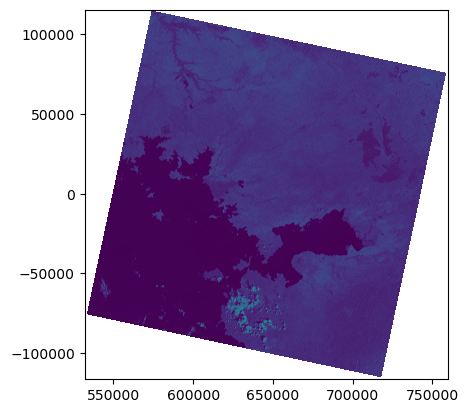

<AxesSubplot: >

In [15]:
# Plot the raster
from rasterio.plot import show
show(band6)

Wallaaah! There goes our raster image. 

However, our raster image could do better with some color. Let's add some groove to the above dull image. By adding the `cmap` property to the `show` function, we can transform our raster to match any color schema.

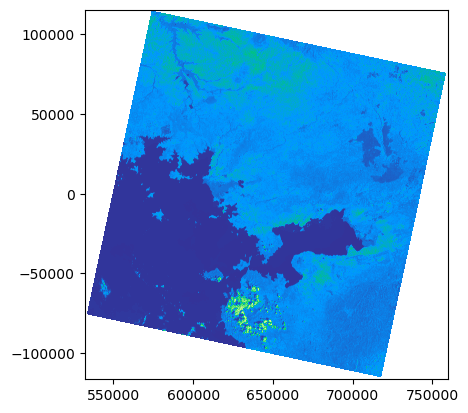

<AxesSubplot: >

In [16]:
# Plot the raster with some color
show(band6, cmap='terrain')

Not bad. What do you think the deep blue feature at the bottom looks like? Just make an uninformed guess, even if you don't know the area we are working with. Refer to the Explorer if necessary for the Landsat 9 image on 2022/01/14 over Kisumu, Kenya.

There is one problem though. Rarely does one work with a raster file that huge. Unless where absolutely necessary, it is recommended to crop a raster into a specific area of interest. This not only keeps the focus, but is gentle on your computer. 

To make matters in this exercise simpler, we have already provided the shapefile to perform the clipping operation. Sometimes clipping is known as cropping, as in like cropping your screenshot on phone. The shapefile is available from [here](https://www.dropbox.com/scl/fo/051dwi75pj3xujyyesw9j/h?dl=0&rlkey=8uiylww82xd8wwe681wb4n6v0).

In [17]:
# First import the package for spatial operations
import geopandas as gpd

To load a shapefile into python, the `read_file` function is used.

In [18]:
# Read the shapefile
shapefile = gpd.read_file("E:/documents/gis800_articles/satellite_python/roi.shp")

For any clipping, cropping or masking operation in python, by whatever name you call it, both files have to be in the same  Coordinate Reference System (CRS). Let's first check out the CRS for our `band6` from which we shall transform our shapefile into.

In [19]:
# Check CRS of band6
band6.crs

CRS.from_epsg(32636)

For some unknown reason, it shows its CRS values as `from_epsg(32636)`. This looks weird, so let's change the output to something more *professionally* looking.

In [20]:
band6.crs.to_proj4()

'+init=epsg:32636'

That's a bit better. Time to convert our `shapefile` to the above CRS. The `to_crs` function can easily do this.

In [21]:
# Change the CRS of the shapefile
shapefile2 = shapefile.to_crs("EPSG:32636")

Confirm that `shapefile2` has the intended CRS.

In [22]:
# Check the CRS of our new shapefile
shapefile2.crs

<Derived Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Turkey. Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now it so happens that the masking process in python requires far more details and work than the 'Extract raster' tool in Qgis. Infact, Python will not mask a raster with a shapefile if the geometries of the latter are not in the format it wants them. We learnt this the hard way. We tried it as in the format below only for python to slap us back with an error. 

```python
out_img, out_transform = mask(raster=data, shapes=<our shapefile>, crop=True)
```
This article [here](https://automating-gis-processes.github.io/CSC18/lessons/L6/clipping-raster.html?utm_source=pocket_reader) is a life-saver of how to put in geometries in the format required by the `mask` function. 

It all begins with a custom function. We don't know how we could crack this if it wasn't for the above site.

In [23]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

So what does the above function do to get what we want? Let's go through it line by line. "The signature of a sophisticated technology is its simplicity", Green Arrow said this to John Stewart (Green Lantern) in the cartoon movie: "Green Lantern: Beware my power". We will endeavor to stick with that line as we explain the above simple function.

```python
def getFeatures(gdf):
```

Functions in python are created using the `def` keyword. Next...

```python
import json
```

This code line tells python to import the `json` module, which is used to perform operations on `json` files. 

```python
return [json.loads(gdf.to_json())['features'][0]['geometry']]
```

Let's keep real simple.

`json.loads` - what does it do? Converts json strings into a python dictionary, as vividly explained by this [site](https://www.geeksforgeeks.org/json-loads-in-python/).

`to_json()` - converts a (dataframe) file into json format, as explained [here](https://www.plus2net.com/python/pandas-to_json.php).

Let's try to explain what the return statement does in 10 year old grammar. Don start from left, don't start from right either. Start from the middle. What the return statement does is first convert our geodataframe, given the pseudonym gdf here, to a json file. This is done using ...`gdf.to_json()` method. Next, the `json.loads()` method takes over. It converts our geodataframe (gdf) now turned to json to a python dictionary of dictionaries. What remains of this process is completed by `['features'][0]['geometry']` whose work we explain below.

Now, the output from `json.loads` is a dictionary of dictionaries. What with type, coordinates, id whatever. Specicically coordinates fall under the `geometries` key and this is why you see why we refer to the output as dictionary of dictionaries. Just peep two cells below, next to the `features` key and you get the idea. The `['features'][0]['geometry']` does this, go to the dictionary key `features`. We know its value is a list of dictionaries, but go to index[0] of this list. We specify 0 because there are other values at index 1 ('id'), index 2 ('properties') and so on but we don't need them. Now within index[0] get the dictionary called `geometry`. All this looks fuzzy but will be made clear in the illustration that follows. 


In [24]:
# Illustrate the result of converting geodataframe to json file
import json
import pprint
pprint.pprint(json.loads(shapefile2.to_json()))

{'features': [{'geometry': {'coordinates': [[[600420.787380679,
                                              16174.610129092142],
                                             [638888.0705606076,
                                              16866.595389247683],
                                             [638888.0705606074,
                                              -26834.935271344206],
                                             [600704.6787694613,
                                              -26692.989576953325],
                                             [600420.787380679,
                                              16174.610129092142]]],
                            'type': 'Polygon'},
               'id': '0',
               'properties': {'FID': 0},
               'type': 'Feature'}],
 'type': 'FeatureCollection'}


In [25]:
# An illustration to show the values of dictionary key - 'geometry'
pprint.pprint(json.loads(shapefile2.to_json())['features'][0]['geometry'])

{'coordinates': [[[600420.787380679, 16174.610129092142],
                  [638888.0705606076, 16866.595389247683],
                  [638888.0705606074, -26834.935271344206],
                  [600704.6787694613, -26692.989576953325],
                  [600420.787380679, 16174.610129092142]]],
 'type': 'Polygon'}


In [26]:
# An illustration to show the values of other keys in the dictionary
pprint.pprint(json.loads(shapefile2.to_json())['features'][0]['id'])

'0'


After all has been said and done, let's apply our function to the `shapefile2` object. This is in order to get the geometries in the format preferred by `mask` function. That is, the shapefile values must be a **GEOJSON** dictionary.

In [27]:
# Get geometries in format required by mask
shapefile_coords = getFeatures(shapefile2)

Let's view the coordinates in our `shapefile_coords` object. 

In [28]:
# Print coordinates
print(shapefile_coords)

[{'type': 'Polygon', 'coordinates': [[[600420.787380679, 16174.610129092142], [638888.0705606076, 16866.595389247683], [638888.0705606074, -26834.935271344206], [600704.6787694613, -26692.989576953325], [600420.787380679, 16174.610129092142]]]}]


With our coordinatess in the required format, it's time to not spare the axe in any way in clipping our raster image --`band6`.

In [29]:
# Now crop the raster using the shapefile_coords
from rasterio.mask import mask
band6_crop, band6_transform = mask(dataset=band6, shapes=shapefile_coords, crop=True)

"Why use two object names, `band6_crop` and `band6_transform`? Isn't one enough? The trick we have used here is simply store the result of mask to two object names all at once. This is just the same way you would set your phone to simultaneously store a number or a photo to both googe drive and phone storage. In fact, to make this concept naturally sink in, consider the below example. 


In [30]:
number, num = str(24)

print("Number is ", number)
print("Number is ", num)

Number is  2
Number is  4


We are simply storing the string 24 to two variable names, `number` and `num`. Upon printing each, they both display the string 24. We just did the same for the resulting output(s) from the `mask` function. This trick is particularly useful if you would like to use the same feature in more than one activity.

All satellite bands have metadata attributes in them. Just check for band6 and you will see its metadata. However, unlike in Qgis where the metadata is retained or modified after using the `Extract raster` tool, in python it all seems to disappear unless you copy it back. To validate our findings, let's check out if the metadata exists in both our rasters: `band6` and `band6_crop`.

In [31]:
# Check metadata for band6
band6.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7591,
 'height': 7731,
 'count': 1,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(30.0, 0.0, 531885.0,
        0.0, -30.0, 115515.0)}

Checking metadata for band6_crop gives you this.

band6_crop.meta

This is what you get:
```python
AttributeError                            Traceback (most recent call last)
Input In [101], in <cell line: 2>()
      1 # Check metadata for band6_crop
----> 2 band6_crop.meta

AttributeError: 'numpy.ndarray' object has no attribute 'meta'
```

Zilch. 

Let's copy the metadata of the former to the latter. 

In [32]:
# Copy the original metadata to band6_crop
band6_crop_meta = band6.meta.copy()
band6_crop_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7591,
 'height': 7731,
 'count': 1,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(30.0, 0.0, 531885.0,
        0.0, -30.0, 115515.0)}

Now update the metadata for our cropped image with the correct values. Since our data is cropped, there is no way it can retain the same properties of the parent raster!

In [33]:
# Update the metadata for our cropped raster from the original
band6_crop_meta.update({"driver": "GTiff",
                        "height": band6_crop.shape[1],
                        "width": band6_crop.shape[2],
                        "transform": band6_transform,
                        "crs": band6.crs.to_proj4()})

band6_crop_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 1283,
 'height': 1457,
 'count': 1,
 'crs': '+init=epsg:32636',
 'transform': Affine(30.0, 0.0, 600405.0,
        0.0, -30.0, 16875.0)}

Don't scratch your head, there's no magic done here. To clear the mist, study the structure of `band6_crop_meta` with that of band6's metadata. You will notice the metadata of `band6_crop_meta` follows that of its predecessor like so: 'driver', 'height', 'width', 'transform' and 'crs'. The only eyebrow raising function used here is `shape`. Shape simply returns the [dimensions of a Pandas or Numpys object](https://www.digitalocean.com/community/tutorials/python-shape-method). At the very basic level, computers read data in terms of two digits only, 0 and 1. They do the same for every data, images included, and in our case, rasters also. Even code is read in terms of 0 and 1! 

To experiment with the functionality of `shape` function. Check the following two examples. The `update` method updates `band6_crop_meta` with the metadata of our cropped image (band6_crop). The `shape` function gets the dimensions of our cropped image and inscribes them into our metadata. The below three code lines illustrate everything.

In [34]:
# We use shape to get the height value. Crosscheck that the height values from shape operation match to those of band6
band6_crop.shape[1]

1457

In [35]:
# We use shape to get the width value. Crosscheck that the width values from shape operation match to those of band6
band6_crop.shape[2]

1283

## Plot and save the raster

Finally, since our cropped raster has all the right dimenions, isn't it time we plotted and saved it?

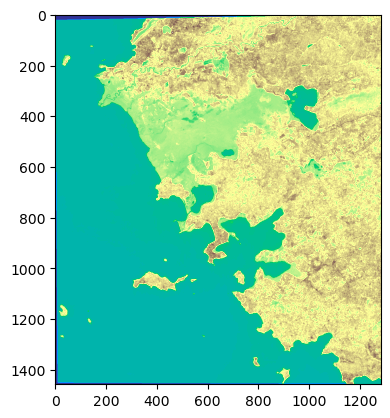

<AxesSubplot: >

In [36]:
# Plot the raster
show(band6_crop, cmap='terrain')

To save our raster, use the code below. The ** which stands for other keyword arguments in python, simply tells python to store the same metadata found in the object `band6_crop_meta` to the new file in our directory.
    

In [37]:
# Save our above raster
with rio.open("E:/documents/gis800_articles/satellite_python/results/band6_cropped.tif", mode='w', **band6_crop_meta) as dest:
    dest.write(band6_crop)

# Conclusion

This exercise was an overview of raster operations in python. We began by hinting at a possible source of satellite images, which as per this exercise, was Earth Explorer. We used python functions to load, read, crop and plot a satellite band image. We have seen that handling rasters in python requires various packages, but most important of them is `rasterio`. Other python functionalities are not excluded since the `rasterio` package depends on them to churn out sensible outputs. 
